In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("darkgrid")

import numpy as np
import pandas as pd

data = pd.read_csv('college.csv')
data

,state,undergrads,population,collegerate
0,New Jersey,326358,8640218,37.771964
1,Nevada,100760,2484196,40.560407
2,Alaska,27463,676301,40.607658
3,Georgia,378947,9318715,40.665156
4,Connecticut,142926,3487896,40.977713
5,Tennessee,250974,6068306,41.358165
6,Florida,775171,18019093,43.019424
7,South Carolina,187254,4324799,43.297735
8,Maine,58512,1313355,44.551549
9,Hawaii,57527,1275264,45.109875


# A Histogram of Undergrads in States

## The Data

In [3]:
mug = data.loc[:, ["state"]]
mug["thousands_of_undergrads"] = data["undergrads"].map(lambda u: u / 1000)
mug = mug.sort_values(by="thousands_of_undergrads", ignore_index=True)
mug

,state,thousands_of_undergrads
0,Alaska,27.463
1,Wyoming,30.928
2,Vermont,34.923
3,Delaware,42.488
4,South Dakota,42.985
5,Montana,42.990
6,North Dakota,44.042
7,Hawaii,57.527
8,Maine,58.512
9,New Hampshire,59.405


In [4]:
mug.describe()

,thousands_of_undergrads
count,50.000000
mean,302.135860
std,358.459594
min,27.463000
25%,90.659000
50%,203.641000
75%,333.222750
max,2172.354000


### Median (Center)

In [5]:
mug.count()

state                      50
thousands_of_undergrads    50
dtype: int64

In [6]:
mug.loc[24:25, ["thousands_of_undergrads"]]

,thousands_of_undergrads
24,194.567
25,212.715


### Range (Spread)

In [7]:
mug.min()

state                      Alabama
thousands_of_undergrads     27.463
dtype: object

In [8]:
mug.max()

state                       Wyoming
thousands_of_undergrads    2172.354
dtype: object

In [9]:
range = mug.max()["thousands_of_undergrads"] - mug.min()["thousands_of_undergrads"]
print("This distribution's spread is {} undergrads.".format(np.ceil(np.multiply(range, 1000))))

This distribution's spread is 2144891.0 undergrads.


#### State with the largest number of undergrads

In [10]:
max_id = data["undergrads"].idxmax()
print(data.loc[max_id, ["state", "undergrads"]])

state         California
undergrads       2172354
Name: 42, dtype: object


## The Histogram

Text(0, 0.5, 'Number of States')

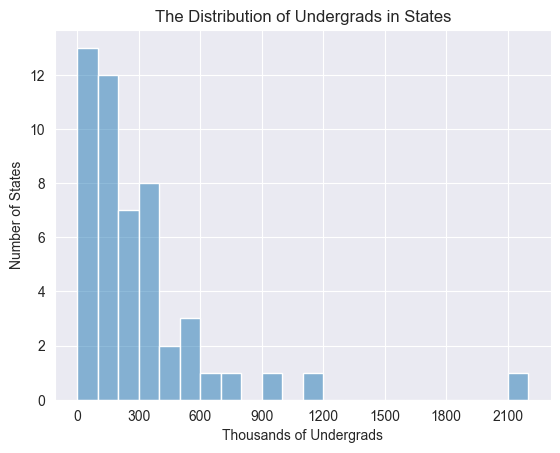

In [11]:
sns.histplot(mug, bins=np.arange(0, 2201, 100), legend=False)
plt.title("The Distribution of Undergrads in States")
plt.xticks(np.arange(0, 2201, 300))
plt.xlabel("Thousands of Undergrads")
plt.ylabel("Number of States")

# A Histogram of Undergrads per Thousand Residents in States

In [24]:
ugmp = data.loc[:, ["state", "collegerate"]]
ugmp = ugmp.sort_values(by="collegerate", ignore_index=True)
ugmp

,state,collegerate
0,New Jersey,37.771964
1,Nevada,40.560407
2,Alaska,40.607658
3,Georgia,40.665156
4,Connecticut,40.977713
5,Tennessee,41.358165
6,Florida,43.019424
7,South Carolina,43.297735
8,Maine,44.551549
9,Hawaii,45.109875


In [25]:
ugmp.describe()

,collegerate
count,50.000000
mean,51.451159
std,8.786338
min,37.771964
25%,45.725213
50%,49.434401
75%,54.456026
max,77.132994


### Median (Center)

In [26]:
ugmp.count()

state          50
collegerate    50
dtype: int64

In [27]:
ugmp.loc[24:25, ["collegerate"]]

,collegerate
24,49.366316
25,49.502486


### Range (Spread)

In [28]:
ugmp.min()

state            Alabama
collegerate    37.771964
dtype: object

In [29]:
ugmp.max()

state            Wyoming
collegerate    77.132994
dtype: object

In [30]:
range = ugmp.max()["collegerate"] - ugmp.min()["collegerate"]
print("This distribution's spread is {} undergrads per thousand residents.".format(range))


This distribution's spread is 39.361030809999995 undergrads per thousand residents.


## The Histogram

Text(0, 0.5, 'Number of States')

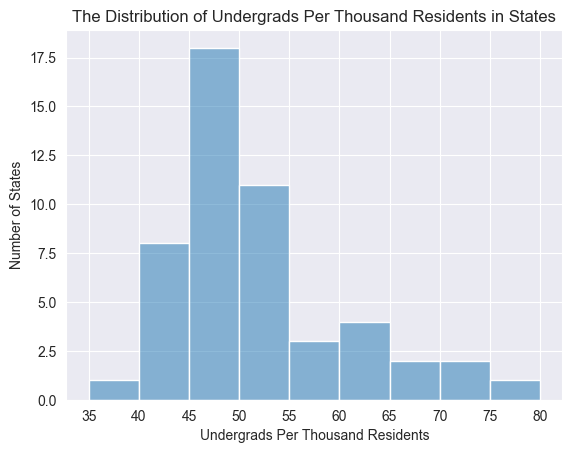

In [31]:
sns.histplot(ugmp, bins=np.arange(35, 81, 5), legend=False)
plt.title("The Distribution of Undergrads Per Thousand Residents in States")
plt.xticks(np.arange(35, 81, 5))
plt.xlabel("Undergrads Per Thousand Residents")
plt.ylabel("Number of States")

# A Stem and Leaf Plot of Undergrads per Thousand Residents in States

In [33]:
rugmp = np.round(ugmp)
rugmp

,state,collegerate
0,New Jersey,38.0
1,Nevada,41.0
2,Alaska,41.0
3,Georgia,41.0
4,Connecticut,41.0
5,Tennessee,41.0
6,Florida,43.0
7,South Carolina,43.0
8,Maine,45.0
9,Hawaii,45.0


In [34]:
rugmp.describe()

,collegerate
count,50.000000
mean,51.440000
std,8.753215
min,38.000000
25%,46.000000
50%,49.500000
75%,54.750000
max,77.000000


In [35]:
print("The Distribution of Undergrads Per Thousand Residents in States")

stem = -1
for i in rugmp["collegerate"]:
    if (int(i / 10) != stem):
        print()
        stem = int(i / 10)
        print("{}|".format(stem), end="")
    if (int(i / 10) == stem):
        print(int(i % 10), end="")
print("\n")

print("Key: 3|8 = 38 undergrads per thousand residents")

The Distribution of Undergrads Per Thousand Residents in States

3|8
4|111113355556667777788889
5|001112224444566
6|0000179
7|127

Key: 3|8 = 38 undergrads per thousand residents


# A Box Plot of Undergrads per Thousand Residents in States

Text(0.5, 0, 'Undergrads Per Thousand Residents')

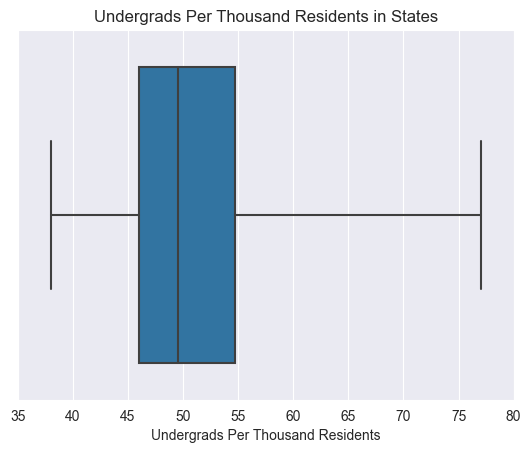

In [36]:
sns.boxplot(x=rugmp["collegerate"], whis=89 / 35)
plt.title("Undergrads Per Thousand Residents in States")
plt.xticks(np.arange(35, 81, 5))
plt.xlabel("Undergrads Per Thousand Residents")
